***
***
***
***
***
<br><h1>A3: Timed Unsupervised Learning Project (Team)</h1>
<h2> Machine Learning </h2><br><br>
Submitted by - Team 5<br>
Hult International Business School<br><br><br>

***
***
***
***
***

<strong>Importing the necessary python packages that are needed for the analysis</strong>

In [1]:
import pandas                as pd                      # data science essentials
import matplotlib.pyplot     as plt                     # fundamental data visualization
import seaborn               as sns                     # enhanced visualization
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

<br><br><br><strong>Running the User defined functions that will be used throughout our analysis</strong>

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('scree_plot.png')
        
    # displaying the plot
    plt.show()

    
########################################
# inertia plot
########################################
def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

<br><br><br>
***
***
***
<h3>Explanatory Data Analysis</h3>

***
***
***

<br><br><br><strong>Loading the original dataset</strong>

In [3]:
original_df = pd.read_excel('Survey_Data_Final_Exam.xlsx')

#Viewing the dataset 
original_df

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,...,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?
0,a1000,4,3,4,3,4,2,3,2,3,...,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino
1,a1001,2,4,3,4,3,3,2,3,4,...,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino
2,a1002,4,4,5,1,4,3,2,2,5,...,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian
3,a1003,4,5,3,3,3,3,5,3,5,...,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian
4,a1004,5,4,4,4,3,3,3,3,3,...,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,a1387,2,2,5,1,4,5,5,2,4,...,3,3,4,Windows laptop,Windows laptop,DD (MBA & Business Analytics),37,Male,calm,Hispanic / Latino
388,a1388,1,3,3,4,4,4,3,1,2,...,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),27,Female,.,White / Caucasian
389,a1389,2,4,4,1,1,4,5,3,5,...,5,5,5,Windows laptop,Macbook,DD (MIB & Business Analytics),23,Male,India,West Asian / Indian
390,a1390,4,5,4,1,5,1,4,1,5,...,5,5,5,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25,Male,INDIAN,West Asian / Indian


In [4]:
#Finding the info of the dataframe
original_df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 79 columns):
surveyID                                                                        392 non-null object
Am the life of the party                                                        392 non-null int64
Feel little concern for others                                                  392 non-null int64
Am always prepared                                                              392 non-null int64
Get stressed out easily                                                         392 non-null int64
Have a rich vocabulary                                                          392 non-null int64
Don't talk a lot                                                                392 non-null int64
Am interested in people                                                         392 non-null int64
Leave my belongings around                                                      392 non-null int64
Am 

In [5]:
#Checking to see if any columns have missing values and summing them up to find the total of missing values
original_df.isnull().any().sum()


1

In [6]:
#Looking at the value that is missing 
original_df['What is your ethnicity?'][original_df['What is your ethnicity?'].isnull()]


147    NaN
Name: What is your ethnicity?, dtype: object

In [7]:
#Looking at all the other columns of the missing row
print(original_df.iloc[147, :])


surveyID                                                a1147
Am the life of the party                                    3
Feel little concern for others                              4
Am always prepared                                          4
Get stressed out easily                                     5
                                             ...             
What program are you in?          One year Business Analytics
What is your age?                                          45
Gender                                                   Male
What is your nationality?                                 USA
What is your ethnicity?                                   NaN
Name: 147, Length: 79, dtype: object


<strong>Question: </strong>How is this guy 45 years old? Fake observation or someone just playing around?

In [8]:
#Filling the missing value 
original_df.fillna('Unanswered', inplace = True)


In [9]:
#Rechecking if any missing value exists
original_df.isnull().any().sum()


0

In [10]:
#Finding the descriptive statistics of the dataset
original_df.loc[:, :].describe().round(2)


,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,...,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,...,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,2.94,2.76,3.57,2.91,3.31,2.90,3.83,2.43,3.30,2.41,...,4.12,4.26,3.94,2.51,3.91,3.94,4.06,3.76,4.28,27.34
std,1.12,1.31,0.89,1.23,0.95,1.14,0.99,1.36,1.09,1.10,...,0.76,0.68,0.77,1.10,0.79,0.73,0.80,0.88,0.75,5.34
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,1.00,15.00
25%,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,2.00,...,4.00,4.00,3.00,2.00,3.00,4.00,4.00,3.00,4.00,24.00
50%,3.00,3.00,4.00,3.00,3.00,3.00,4.00,2.00,3.00,2.00,...,4.00,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,26.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,5.00,3.00,4.00,3.00,...,5.00,5.00,4.00,3.00,4.00,4.00,5.00,4.00,5.00,29.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,51.00


In [11]:
#Renaming the columns for easier identificaition and usage
original_df.columns = ['surveyID', 
                       'life_of_the_party', 
                       'unconcerned_for_others', 
                       'always_prepared', 
                       'stressed_out_easily', 
                       'have_rich_vocabulary', 
                       'less_talkative', 
                       'interested_in_people', 
                       'leave_belongings_around', 
                       'relaxed', 
                       'difficulty_understanding_abstract_ideas', 
                       'comfortable_around_people', 
                       'insult_people', 
                       'attention_to_detail',
                       'worrisome', 
                       'vivid_imagination', 
                       'keep_in_the_background', 
                       'sympathetic', 
                       'messy_person', 
                       'seldom_feel_blue', 
                       'uninterested_in_abstract_ideas', 
                       'starts_conversations', 
                       'uninterested_in_peoples_problems', 
                       'get_chores_done', 
                       'easily_disturbed', 
                       'have_excellent_ideas', 
                       'have_little_to_say', 
                       'soft_hearted', 
                       'forget_to_put_things_back', 
                       'get_upset_easily', 
                       'no_good_imagination', 
                       'socialize_at_parties', 
                       'uninterested_in_others', 
                       'like_order', 
                       'moody', 
                       'quick_at_understanding_things', 
                       'averts_attention_to_self', 
                       'take_time_out_for_others', 
                       'avoids_duties', 
                       'mood_swings',
                       'use_difficult_words', 
                       'likes_being_center_of_attention', 
                       'feel_others_emotions', 
                       'follows_schedule', 
                       'irritated_easily', 
                       'reflects_on_things', 
                       'quite_around_strangers', 
                       'make_people_feel_at_ease', 
                       'exacting_at_work', 
                       'feels_blue', 
                       'full_of_ideas', 
                       'sees_underlying_patters_in_complex_situations', 
                       'dont_generate_new_ideas',
                       'aware_of_personal_strengths/weakness', 
                       'growth_mindset', 
                       'responds_effectively_to_priorities', 
                       'takes_initiative', 
                       'encourages_direct/open_discussions', 
                       'responds_effectively_to_priorities(duplicate)', 
                       'takes_initiative(duplicate)', 
                       'encourages_direct/open_discussions(duplicate)', 
                       'good_listener', 
                       'dont_persuasively_sell_vision/idea', 
                       'builds_cooperative_relationships', 
                       'works_well_with_people_from_diverse_cultures', 
                       'effectively_negotiates_interests/resources/roles', 
                       'cant_rally_team_towards_common_goal', 
                       'translates_ideas_into_plans_that_are_organized/realistic', 
                       'resolves_conflicts_constructively', 
                       'seeks/uses_teammates_feedback', 
                       'coaches_teammates_for_performance/growth', 
                       'drive_for_results', 
                       'current_laptop', 
                       'preferred_laptop', 
                       'program', 
                       'age', 
                       'gender',
                       'nationality', 
                       'ethnicity']

In [12]:
#Finding the value counts of categorical variables
print(original_df.loc[:, 'current_laptop'].value_counts())
print("\n")
print(original_df.loc[:, 'preferred_laptop'].value_counts())
print("\n")
print(original_df.loc[:, 'program'].value_counts())
print("\n")
print(original_df.loc[:, 'gender'].value_counts())
print("\n")
print(original_df.loc[:, 'nationality'].value_counts())
print("\n")
print(original_df.loc[:, 'ethnicity'].value_counts())


Macbook           199
Windows laptop    192
MAC                 1
Name: current_laptop, dtype: int64


Macbook           218
Windows laptop    163
Chromebook         10
MAC                 1
Name: preferred_laptop, dtype: int64


DD (MIB & Business Analytics)       198
One year Business Analytics          99
DD (MBA & Business Analytics)        93
DD (MBA & Disruptive innovation)      2
Name: program, dtype: int64


Male      227
Female    165
Name: gender, dtype: int64


Indian                51
China                 28
German                17
Mexican               14
Peruvian              11
                      ..
Malaysia               1
Cameroon               1
Caribbean-American     1
Dominican Republic     1
Armenia                1
Name: nationality, Length: 106, dtype: int64


White / Caucasian       98
Far east Asian          85
West Asian / Indian     77
Hispanic / Latino       70
Prefer not to answer    31
African American        21
Middle Eastern           7
Native Ameri

In [13]:
#Analysis of current laptop brand per answer

current_laptop = original_df.loc[:, 'current_laptop']

current_windows    = 0
current_macbook    = 0
current_chromebook = 0
current_total      = 0

for brand in current_laptop:
    if brand == "Windows laptop":
        current_windows += 1
        current_total += 1
    
    elif brand == 'Chromebook':
        current_chromebook += 1
        current_total += 1
        
    else:
        current_macbook += 1
        current_total += 1

perc_windows = round((current_windows/current_total) * 100, 1)
perc_macbook = round((current_macbook/current_total) * 100, 1)
perc_chromebook = round((current_chromebook/current_total) * 100, 1)

print(f"""
        Total computers:           {current_total}
        Total current Windows:     {current_windows}, a {perc_windows}% of the total.
        Total current Macbooks:    {current_macbook}, a {perc_macbook}% of the total.
        Total current Chromebooks: {current_chromebook}, a {perc_chromebook}% of the total.
        _____________________________________________________
        """)



        Total computers:           392
        Total current Windows:     192, a 49.0% of the total.
        Total current Macbooks:    200, a 51.0% of the total.
        Total current Chromebooks: 0, a 0.0% of the total.
        _____________________________________________________
        


In [14]:
#Analysis of preferred laptop brand per answer

preferred_laptop_laptop = original_df.loc[:, 'preferred_laptop']

preferred_laptop_windows    = 0
preferred_laptop_macbook    = 0
preferred_laptop_chromebook = 0
preferred_laptop_total      = 0

for brand in preferred_laptop_laptop:
    if brand == "Windows laptop":
        preferred_laptop_windows += 1
        preferred_laptop_total += 1
    
    elif brand == 'Chromebook':
        preferred_laptop_chromebook += 1
        preferred_laptop_total += 1
        
    else:
        preferred_laptop_macbook += 1
        preferred_laptop_total += 1

diff_wind = preferred_laptop_windows - current_windows
diff_mac = preferred_laptop_macbook - current_macbook

change_windows = round(((preferred_laptop_windows - current_windows)/current_windows) * 100, 1)
change_macbook = round(((preferred_laptop_macbook - current_macbook)/current_macbook) * 100, 1)
#change_chromebook = round((preferred_laptop_chromebook/target_total) * 100, 1)


print(f"""
        Total computers:             {preferred_laptop_total}
        Total preferred Windows:     {preferred_laptop_windows}, a change of {diff_wind} units ({change_windows}%).
        Total preferred Macbooks:    {preferred_laptop_macbook}, a change of {diff_mac} units ({change_macbook}%).
        Total preferred Chromebooks:  {preferred_laptop_chromebook}, a new player!
        _____________________________________________________
        """)



        Total computers:             392
        Total preferred Windows:     163, a change of -29 units (-15.1%).
        Total preferred Macbooks:    219, a change of 19 units (9.5%).
        Total preferred Chromebooks:  10, a new player!
        _____________________________________________________
        


<strong>INSIGHT 1:</strong><br>
When it comes to branding and operating system, the sample is evenly distributed. In this sense, 51% of the survey owns a Macbook (200 people), and 49% have a Windows laptop. However, in the context of all devices having the same retail price, the distribution would change as follows: Macbook would increase by 19 units (56% of total), Windows would decrease by 29 units (41.5% of total), and Chromebook would have 10 units (2.5%). Note that although Macbook increased in total units, it would lose 16 users to Windows, and 3 users to Chromebook.

<br><br><br><strong>To maintain the similarity between features as required in Unsupervised learning, dropping variables that do not match with the survey questions, where people gave a rating between 1 and 5</strong>

In [15]:
survey_answers = original_df.drop(['surveyID', 'current_laptop', 'preferred_laptop', 'program', 'age', 'gender',
                                   'nationality', 'ethnicity'], axis = 1)

#Viewing the new dataset
survey_answers


,life_of_the_party,unconcerned_for_others,always_prepared,stressed_out_easily,have_rich_vocabulary,less_talkative,interested_in_people,leave_belongings_around,relaxed,difficulty_understanding_abstract_ideas,...,dont_persuasively_sell_vision/idea,builds_cooperative_relationships,works_well_with_people_from_diverse_cultures,effectively_negotiates_interests/resources/roles,cant_rally_team_towards_common_goal,translates_ideas_into_plans_that_are_organized/realistic,resolves_conflicts_constructively,seeks/uses_teammates_feedback,coaches_teammates_for_performance/growth,drive_for_results
0,4,3,4,3,4,2,3,2,3,2,...,3,4,4,4,2,4,4,4,4,4
1,2,4,3,4,3,3,2,3,4,2,...,2,4,4,2,3,4,5,5,4,5
2,4,4,5,1,4,3,2,2,5,1,...,2,3,4,4,2,4,2,3,3,5
3,4,5,3,3,3,3,5,3,5,4,...,3,5,5,5,5,3,5,5,5,5
4,5,4,4,4,3,3,3,3,3,3,...,4,3,3,4,4,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2,2,5,1,4,5,5,2,4,2,...,2,4,4,3,3,4,4,3,3,4
388,1,3,3,4,4,4,3,1,2,4,...,2,4,4,4,4,4,4,4,4,4
389,2,4,4,1,1,4,5,3,5,5,...,3,5,4,5,5,5,5,5,5,5
390,4,5,4,1,5,1,4,1,5,3,...,4,5,5,5,1,5,5,5,5,5


<br><br><strong>Separating columns that relate to Big 5 personality traits and Hult DNA.</strong>


In [16]:
#Subsetting the Big5 personality traits
survey_answers_big5 =   survey_answers.loc[:, ['life_of_the_party', 
                                               'unconcerned_for_others', 
                                               'always_prepared', 
                                               'stressed_out_easily', 
                                               'have_rich_vocabulary', 
                                               'less_talkative', 
                                               'interested_in_people', 
                                               'leave_belongings_around', 
                                               'relaxed', 
                                               'difficulty_understanding_abstract_ideas', 
                                               'comfortable_around_people', 
                                               'insult_people', 
                                               'attention_to_detail',
                                               'worrisome', 
                                               'vivid_imagination', 
                                               'keep_in_the_background', 
                                               'sympathetic', 
                                               'messy_person', 
                                               'seldom_feel_blue', 
                                               'uninterested_in_abstract_ideas', 
                                               'starts_conversations', 
                                               'uninterested_in_peoples_problems', 
                                               'get_chores_done', 
                                               'easily_disturbed', 
                                               'have_excellent_ideas', 
                                               'have_little_to_say', 
                                               'soft_hearted', 
                                               'forget_to_put_things_back', 
                                               'get_upset_easily', 
                                               'no_good_imagination', 
                                               'socialize_at_parties', 
                                               'uninterested_in_others', 
                                               'like_order', 
                                               'moody', 
                                               'quick_at_understanding_things', 
                                               'averts_attention_to_self', 
                                               'take_time_out_for_others', 
                                               'avoids_duties', 
                                               'mood_swings',
                                               'use_difficult_words', 
                                               'likes_being_center_of_attention', 
                                               'feel_others_emotions', 
                                               'follows_schedule', 
                                               'irritated_easily', 
                                               'reflects_on_things', 
                                               'quite_around_strangers', 
                                               'make_people_feel_at_ease', 
                                               'exacting_at_work', 
                                               'feels_blue', 
                                               'full_of_ideas']]

#Checking the results
survey_answers_big5


,life_of_the_party,unconcerned_for_others,always_prepared,stressed_out_easily,have_rich_vocabulary,less_talkative,interested_in_people,leave_belongings_around,relaxed,difficulty_understanding_abstract_ideas,...,likes_being_center_of_attention,feel_others_emotions,follows_schedule,irritated_easily,reflects_on_things,quite_around_strangers,make_people_feel_at_ease,exacting_at_work,feels_blue,full_of_ideas
0,4,3,4,3,4,2,3,2,3,2,...,3,3,4,2,4,3,3,4,2,3
1,2,4,3,4,3,3,2,3,4,2,...,2,3,5,4,5,4,5,5,3,4
2,4,4,5,1,4,3,2,2,5,1,...,5,3,4,4,2,3,3,3,1,4
3,4,5,3,3,3,3,5,3,5,4,...,2,5,3,5,5,3,5,3,3,5
4,5,4,4,4,3,3,3,3,3,3,...,4,4,4,3,3,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2,2,5,1,4,5,5,2,4,2,...,2,4,5,3,5,2,4,5,2,4
388,1,3,3,4,4,4,3,1,2,4,...,3,3,3,3,4,4,4,4,3,4
389,2,4,4,1,1,4,5,3,5,5,...,5,5,5,1,5,5,5,5,1,5
390,4,5,4,1,5,1,4,1,5,3,...,3,5,5,1,4,1,5,5,1,5


In [17]:
#Choosing columns with Hult DNA
survey_answers_hultdna = survey_answers.loc[:,['sees_underlying_patters_in_complex_situations', 
                                               'dont_generate_new_ideas',
                                               'aware_of_personal_strengths/weakness', 
                                               'growth_mindset', 
                                               'responds_effectively_to_priorities', 
                                               'takes_initiative', 
                                               'encourages_direct/open_discussions', 
                                               'responds_effectively_to_priorities(duplicate)', 
                                               'takes_initiative(duplicate)', 
                                               'encourages_direct/open_discussions(duplicate)', 
                                               'good_listener', 
                                               'dont_persuasively_sell_vision/idea', 
                                               'builds_cooperative_relationships', 
                                               'works_well_with_people_from_diverse_cultures', 
                                               'effectively_negotiates_interests/resources/roles', 
                                               'cant_rally_team_towards_common_goal', 
                                               'translates_ideas_into_plans_that_are_organized/realistic', 
                                               'resolves_conflicts_constructively', 
                                               'seeks/uses_teammates_feedback', 
                                               'coaches_teammates_for_performance/growth', 
                                               'drive_for_results']]

#Checking the dataset
survey_answers_hultdna


,sees_underlying_patters_in_complex_situations,dont_generate_new_ideas,aware_of_personal_strengths/weakness,growth_mindset,responds_effectively_to_priorities,takes_initiative,encourages_direct/open_discussions,responds_effectively_to_priorities(duplicate),takes_initiative(duplicate),encourages_direct/open_discussions(duplicate),...,dont_persuasively_sell_vision/idea,builds_cooperative_relationships,works_well_with_people_from_diverse_cultures,effectively_negotiates_interests/resources/roles,cant_rally_team_towards_common_goal,translates_ideas_into_plans_that_are_organized/realistic,resolves_conflicts_constructively,seeks/uses_teammates_feedback,coaches_teammates_for_performance/growth,drive_for_results
0,4,2,4,4,4,4,4,4,4,4,...,3,4,4,4,2,4,4,4,4,4
1,4,2,2,4,4,4,5,5,5,5,...,2,4,4,2,3,4,5,5,4,5
2,3,2,5,3,5,2,3,5,2,3,...,2,3,4,4,2,4,2,3,3,5
3,3,3,3,5,5,5,4,4,4,4,...,3,5,5,5,5,3,5,5,5,5
4,3,3,5,3,3,3,3,3,3,4,...,4,3,3,4,4,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,3,2,4,4,3,3,3,4,4,4,...,2,4,4,3,3,4,4,3,3,4
388,4,4,4,4,4,4,4,4,4,4,...,2,4,4,4,4,4,4,4,4,4
389,5,1,5,5,5,5,5,5,5,5,...,3,5,4,5,5,5,5,5,5,5
390,5,1,3,5,5,4,5,5,4,5,...,4,5,5,5,1,5,5,5,5,5


In [18]:
#print(survey_answers_hultdna['responds_effectively_to_priorities'].corr(survey_answers_hultdna['responds_effectively_to_priorities(duplicate)']))
#print("\n")
#print(survey_answers_hultdna['takes_initiative'].corr(survey_answers_hultdna['takes_initiative(duplicate)']))
#print("\n")
#print(survey_answers_hultdna['encourages_direct/open_discussions'].corr(survey_answers_hultdna['encourages_direct/open_discussions(duplicate)']))

<strong>Note:</strong> There are 3 repeated questions, labeled as (duplicates). We will use them as is, since they look highly correlated and the PCA algorithm works fine with highly correlated explanatory variables.

<br><br><br><strong>Scaling the explanatory variables, so that they can be used in PCA and KNN clustering methods</strong>

<h4>Scaling the whole survey_answers explanatory variables</h4>

In [19]:
#Instantiating a StandartScaler object
scaler = StandardScaler()

#Fitting the scaler object to the explanatory data
scaler.fit(survey_answers)

#Transforming the fit data
survey_answers_scaled = scaler.transform(survey_answers)

#Converting into a dataframe object
survey_answers_scaled_df = pd.DataFrame(survey_answers_scaled)

#Renaming the columns 
survey_answers_scaled_df.columns = survey_answers.columns

#Checking the variance before and after scaling
print(pd.np.var(survey_answers))
print("\n")
print(pd.np.var(survey_answers_scaled_df))


life_of_the_party                                           1.246252
unconcerned_for_others                                      1.712906
always_prepared                                             0.791174
stressed_out_easily                                         1.498744
have_rich_vocabulary                                        0.903139
                                                              ...   
translates_ideas_into_plans_that_are_organized/realistic    0.620028
resolves_conflicts_constructively                           0.524619
seeks/uses_teammates_feedback                               0.641966
coaches_teammates_for_performance/growth                    0.767694
drive_for_results                                           0.556747
Length: 71, dtype: float64


life_of_the_party                                           1.0
unconcerned_for_others                                      1.0
always_prepared                                             1.0
stressed_out_easily 

<h4>Scaling the Big5 personality traits explanatory variables</h4>

In [20]:
#Instantiating a StandartScaler object
scaler = StandardScaler()

#Fitting the scaler object to the explanatory data
scaler.fit(survey_answers_big5)

#Transforming the fit data
survey_answers_big5_scaled = scaler.transform(survey_answers_big5)

#Converting into a dataframe object
survey_answers_big5_scaled_df = pd.DataFrame(survey_answers_big5_scaled)

#Renaming the columns 
survey_answers_big5_scaled_df.columns = survey_answers_big5.columns

#Checking the variance before and after scaling
print(pd.np.var(survey_answers_big5))
print("\n")
print(pd.np.var(survey_answers_big5_scaled_df))


life_of_the_party                          1.246252
unconcerned_for_others                     1.712906
always_prepared                            0.791174
stressed_out_easily                        1.498744
have_rich_vocabulary                       0.903139
less_talkative                             1.300812
interested_in_people                       0.976754
leave_belongings_around                    1.832335
relaxed                                    1.191008
difficulty_understanding_abstract_ideas    1.200275
comfortable_around_people                  0.988312
insult_people                              0.924511
attention_to_detail                        0.686355
worrisome                                  1.267538
vivid_imagination                          0.869579
keep_in_the_background                     1.012911
sympathetic                                0.737401
messy_person                               1.166174
seldom_feel_blue                           1.082355
uninterested

<h4>Scaling the Hult DNA explanatory variables</h4>

In [21]:
#Instantiating a StandartScaler object
scaler = StandardScaler()

#Fitting the scaler object to the explanatory data
scaler.fit(survey_answers_hultdna)

#Transforming the fit data
survey_answers_hultdna_scaled = scaler.transform(survey_answers_hultdna)

#Converting into a dataframe object
survey_answers_hultdna_scaled_df = pd.DataFrame(survey_answers_hultdna_scaled)

#Renaming the columns 
survey_answers_hultdna_scaled_df.columns = survey_answers_hultdna.columns

#Checking the variance before and after scaling
print(pd.np.var(survey_answers_hultdna))
print("\n")
print(pd.np.var(survey_answers_hultdna_scaled_df))

sees_underlying_patters_in_complex_situations               0.671908
dont_generate_new_ideas                                     1.102763
aware_of_personal_strengths/weakness                        0.604585
growth_mindset                                              0.596939
responds_effectively_to_priorities                          0.648161
takes_initiative                                            0.818142
encourages_direct/open_discussions                          0.652124
responds_effectively_to_priorities(duplicate)               0.522432
takes_initiative(duplicate)                                 0.771131
encourages_direct/open_discussions(duplicate)               0.627447
good_listener                                               0.659250
dont_persuasively_sell_vision/idea                          1.059350
builds_cooperative_relationships                            0.574910
works_well_with_people_from_diverse_cultures                0.464123
effectively_negotiates_interests/r

<br><br><br><strong>Creating a correlation heatmap</strong>

In [22]:
#Setting plot size
#fig, ax = plt.subplots(figsize = (12, 12))


#Developing a correlation matrix object
#survey_answers_scaled_df_corr = survey_answers_scaled_df.corr().round(2).iloc[0:19, 0:19]


#Creating a correlation heatmap
#sns.heatmap(survey_answers_scaled_df_corr,
#            cmap   = 'coolwarm',
#            square = True,
#            annot  = True)

#Display the heatmap
#plt.show()

In [23]:
#Setting plot size
#fig, ax = plt.subplots(figsize = (12, 12))


#Developing a correlation matrix object
#survey_answers_scaled_df_corr = survey_answers_scaled_df.corr().round(2).iloc[20:39, 20:39]


#Creating a correlation heatmap
#sns.heatmap(survey_answers_scaled_df_corr,
#            cmap   = 'coolwarm',
#            square = True,
#            annot  = True)

#Display the heatmap
#plt.show()

In [24]:
#Setting plot size
#fig, ax = plt.subplots(figsize = (12, 12))


#Developing a correlation matrix object
#survey_answers_scaled_df_corr = survey_answers_scaled_df.corr().round(2).iloc[40:59, 40:59]


#Creating a correlation heatmap
#sns.heatmap(survey_answers_scaled_df_corr,
#            cmap   = 'coolwarm',
#            square = True,
#            annot  = True)

#Display the heatmap
#plt.show()

In [25]:
#Setting plot size
#fig, ax = plt.subplots(figsize = (12, 12))


#Developing a correlation matrix object
#survey_answers_scaled_df_corr = survey_answers_scaled_df.corr().round(2).iloc[60:71, 60:71]


#Creating a correlation heatmap
#sns.heatmap(survey_answers_scaled_df_corr,
#            cmap   = 'coolwarm',
#            square = True,
#            annot  = True)

#Display the heatmap
#plt.show()

<strong>As can be seen from the correlation heatmaps, there are only a few correlations that are above 0.5 or below -0.5. Implying that we could explain high degree of variance using only a few Principal Components in PCA.</strong>

<br><br><br>
***
***
***
<h3>Principal Component Analysis</h3>

***
***
***

<h4>PCA performed on the whole survey_answers_scaled explanatory variables</h4>

In [26]:
#Instantiating a PCA object without specific mention of components
#pca = PCA(n_components = None,
#          random_state = 222)

#Fitting and Transforming the scaled survey data
#pca_survey = pca.fit_transform(survey_answers_scaled)

#Comparing shapes
#print("Original shape:", survey_answers_scaled.shape)
#print("PCA shape     :", pca_survey.shape)


<br><br><br><strong>Plotting a Scree plot to visually detect the number of principal components to be used.</strong>

In [27]:
#Calling the scree plot function
#scree_plot(pca_object=pca)


<strong>Based on the Scree plot, it is a good choice to go with 7 Principal Components, as seen by the elbow of the plot at 7 PCA feature, after which there is very less change in explained variance.</strong>

In [28]:
#Instanting a PCA object with just the first 7 PC's
#pca7 = PCA(n_components = 7,
#           random_state = 222)

#Fitting and Transforming the scaled survey data
#pca7_survey = pca7.fit_transform(survey_answers_scaled)


<br><br><strong>Checking each components explained Variance ratio</strong>

In [29]:
#Component number counter
#component_number = 0


#Looping over each principal component
#for variance in pca7.explained_variance_ratio_:
#    component_number += 1
#    print(f"PC {component_number} : {variance.round(3)}")


<br><br><br><strong>Understanding the meaning of each principal component by analyzing its factor loading</strong>

In [30]:
#Transposing pca components
#factor_loadings_df = pd.DataFrame(pd.np.transpose(pca7.components_))


#Naming rows as original features
#factor_loadings_df = factor_loadings_df.set_index(survey_answers_scaled_df.columns)


#Checking the result
#print(f"""
#---------------------------------------
#FACTOR LOADING: PRINCIPAL COMPONENT 1
#---------------------------------------""")
#print(factor_loadings_df.iloc[:,0][factor_loadings_df.iloc[:,0]>0.1].sort_values(ascending = False))
#print("\n")
#print(factor_loadings_df.iloc[:,0][factor_loadings_df.iloc[:,0]<-0.18].sort_values(ascending = True))
#print("\n\n")

#print(f"""
#---------------------------------------
#FACTOR LOADING: PRINCIPAL COMPONENT 2
#---------------------------------------""")
#print(factor_loadings_df.iloc[:,1][factor_loadings_df.iloc[:,1]>0.25].sort_values(ascending = False))
#print("\n")
#print(factor_loadings_df.iloc[:,1][factor_loadings_df.iloc[:,1]<-0.07].sort_values(ascending = True))
#print("\n\n")

#print(f"""
#---------------------------------------
#FACTOR LOADING: PRINCIPAL COMPONENT 3
#---------------------------------------""")
#print(factor_loadings_df.iloc[:,2][factor_loadings_df.iloc[:,2]>0.15].sort_values(ascending = False))
#print("\n")
#print(factor_loadings_df.iloc[:,2][factor_loadings_df.iloc[:,2]<-0.16].sort_values(ascending = True))
#print("\n\n")

#print(f"""
#---------------------------------------
#FACTOR LOADING: PRINCIPAL COMPONENT 4
#---------------------------------------""")
#print(factor_loadings_df.iloc[:,3][factor_loadings_df.iloc[:,3]>0.19].sort_values(ascending = False))
#print("\n")
#print(factor_loadings_df.iloc[:,3][factor_loadings_df.iloc[:,3]<-0.16].sort_values(ascending = True))
#print("\n\n")

#print(f"""
#---------------------------------------
#FACTOR LOADING: PRINCIPAL COMPONENT 5
#---------------------------------------""")
#print(factor_loadings_df.iloc[:,4][factor_loadings_df.iloc[:,4]>0.19].sort_values(ascending = False))
#print("\n")
#print(factor_loadings_df.iloc[:,4][factor_loadings_df.iloc[:,4]<-0.11].sort_values(ascending = True))
#print("\n\n")

#print(f"""
#---------------------------------------
#FACTOR LOADING: PRINCIPAL COMPONENT 6
#---------------------------------------""")
#print(factor_loadings_df.iloc[:,5][factor_loadings_df.iloc[:,5]>0.18].sort_values(ascending = False))
#print("\n")
#print(factor_loadings_df.iloc[:,5][factor_loadings_df.iloc[:,5]<-0.14].sort_values(ascending = True))
#print("\n\n")

#print(f"""
#---------------------------------------
#FACTOR LOADING: PRINCIPAL COMPONENT 7
#---------------------------------------""")
#print(factor_loadings_df.iloc[:,6][factor_loadings_df.iloc[:,6]>0.18].sort_values(ascending = False))
#print("\n")
#print(factor_loadings_df.iloc[:,6][factor_loadings_df.iloc[:,6]<-0.14].sort_values(ascending = True))
#print("\n\n")


In [31]:
#Naming the Principal Components based on the factor loadings 
#factor_loadings_df.columns = ['uninterested_folks',
#                              'moody_folks',
#                              'Introverts',
#                              'people-centric/sympathetic_folks',
#                              'relaxed/self-centric_folks',
#                              'unimaginative_folks',
#                              'commanding_speakers']

#factor_loadings_df


<br><br><br><strong>Analyzing how each surveyor fits into each of the Principal Components</strong>

In [32]:
#Converting the earlier fit and transformed pca7 object into a Dataframe
#pca7_survey_df = pd.DataFrame(pca7_survey)

#Renaming columns
#pca7_survey_df.columns = factor_loadings_df.columns

#Displaying the results
#pca7_survey_df


<br><br><br><h4>PCA performed on the survey_answers_big5_scaled explanatory variables</h4>

In [33]:
#Instantiating a PCA object without specific mention of components
pca = PCA(n_components = None,
          random_state = 222)

#Fitting and Transforming the scaled survey data
pca_survey_big5 = pca.fit_transform(survey_answers_big5_scaled)

#Comparing shapes
print("Original shape:", survey_answers_big5_scaled.shape)
print("PCA shape     :", pca_survey_big5.shape)


Original shape: (392, 50)
PCA shape     : (392, 50)


<br><br><br><strong>Plotting a Scree plot to visually detect the number of principal components to be used.</strong>

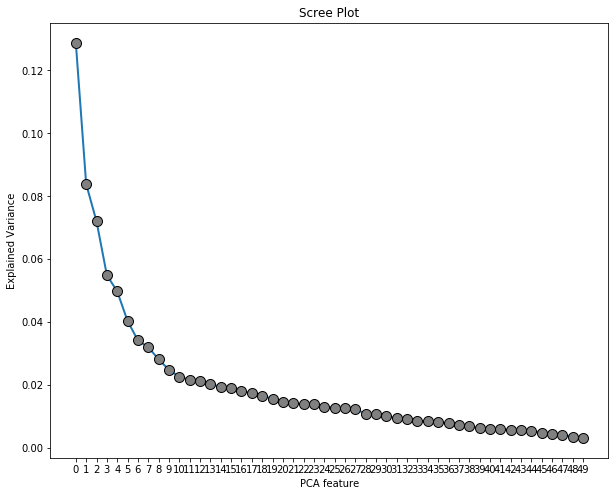

In [34]:
#Calling the scree plot function
scree_plot(pca_object=pca)


<strong>Based on the Scree plot, it is a good choice to go with 7 Principal Components, as seen by the elbow of the plot at 7 PCA feature, after which there is very less change in explained variance.</strong>

In [35]:
#Instanting a PCA object with just the first 7 PC's
pca7 = PCA(n_components = 7,
           random_state = 222)

#Fitting and Transforming the scaled survey data
pca7_survey_big5 = pca7.fit_transform(survey_answers_big5_scaled)


<br><br><strong>Checking each components explained Variance ratio</strong>

In [36]:
#Component number counter
component_number = 0


#Looping over each principal component
for variance in pca7.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")
    

PC 1 : 0.129
PC 2 : 0.084
PC 3 : 0.072
PC 4 : 0.055
PC 5 : 0.05
PC 6 : 0.04
PC 7 : 0.034


<br><br><br><strong>Understanding the meaning of each principal component by analyzing its factor loading</strong>

In [37]:
#Transposing pca components
factor_loadings_big5_df = pd.DataFrame(pd.np.transpose(pca7.components_))


#Naming rows as original features
factor_loadings_big5_df = factor_loadings_big5_df.set_index(survey_answers_big5_scaled_df.columns)


#Checking the result
print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 1
---------------------------------------""")
print(factor_loadings_big5_df.iloc[:,0][factor_loadings_big5_df.iloc[:,0]>0.16].sort_values(ascending = False))
print("\n")
print(factor_loadings_big5_df.iloc[:,0][factor_loadings_big5_df.iloc[:,0]<-0.17].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 2
---------------------------------------""")
print(factor_loadings_big5_df.iloc[:,1][factor_loadings_big5_df.iloc[:,1]>0.25].sort_values(ascending = False))
print("\n")
print(factor_loadings_big5_df.iloc[:,1][factor_loadings_big5_df.iloc[:,1]<-0.07].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 3
---------------------------------------""")
print(factor_loadings_big5_df.iloc[:,2][factor_loadings_big5_df.iloc[:,2]>0.15].sort_values(ascending = False))
print("\n")
print(factor_loadings_big5_df.iloc[:,2][factor_loadings_big5_df.iloc[:,2]<-0.16].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 4
---------------------------------------""")
print(factor_loadings_big5_df.iloc[:,3][factor_loadings_big5_df.iloc[:,3]>0.19].sort_values(ascending = False))
print("\n")
print(factor_loadings_big5_df.iloc[:,3][factor_loadings_big5_df.iloc[:,3]<-0.16].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 5
---------------------------------------""")
print(factor_loadings_big5_df.iloc[:,4][factor_loadings_big5_df.iloc[:,4]>0.19].sort_values(ascending = False))
print("\n")
print(factor_loadings_big5_df.iloc[:,4][factor_loadings_big5_df.iloc[:,4]<-0.11].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 6
---------------------------------------""")
print(factor_loadings_big5_df.iloc[:,5][factor_loadings_big5_df.iloc[:,5]>0.18].sort_values(ascending = False))
print("\n")
print(factor_loadings_big5_df.iloc[:,5][factor_loadings_big5_df.iloc[:,5]<-0.1].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 7
---------------------------------------""")
print(factor_loadings_big5_df.iloc[:,6][factor_loadings_big5_df.iloc[:,6]>0.18].sort_values(ascending = False))
print("\n")
print(factor_loadings_big5_df.iloc[:,6][factor_loadings_big5_df.iloc[:,6]<-0.14].sort_values(ascending = True))
print("\n\n")



---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 1
---------------------------------------
easily_disturbed                  0.190828
get_upset_easily                  0.187856
uninterested_in_others            0.186987
uninterested_in_abstract_ideas    0.180580
have_little_to_say                0.176494
quite_around_strangers            0.172828
mood_swings                       0.168912
less_talkative                    0.160155
Name: 0, dtype: float64


comfortable_around_people   -0.211625
starts_conversations        -0.204033
make_people_feel_at_ease    -0.173915
have_excellent_ideas        -0.173095
feel_others_emotions        -0.171511
Name: 0, dtype: float64




---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 2
---------------------------------------
mood_swings            0.334983
moody                  0.317542
get_upset_easily       0.272259
irritated_easily       0.264165
stressed_out_easily    0.260212
Name: 1, dtype:

In [38]:
#Naming the columns based on the factor loadings
factor_loadings_big5_df.columns = ['prefer_isolation',
                                   'moody',
                                   'non_party_person',
                                   'strong_verbal_aptitude',
                                   'relaxed',
                                   'systematic',
                                   'creative']

factor_loadings_big5_df

,prefer_isolation,moody,non_party_person,strong_verbal_aptitude,relaxed,systematic,creative
life_of_the_party,-0.070471,0.133817,-0.271499,-0.000063,-0.024013,0.204361,0.050371
unconcerned_for_others,0.122856,-0.013777,-0.069394,0.045497,0.138281,-0.022281,0.177942
always_prepared,-0.126274,-0.006365,0.034432,0.197885,-0.054198,0.264963,0.074808
stressed_out_easily,0.134607,0.260212,0.054517,0.020678,-0.218119,-0.049447,-0.011426
have_rich_vocabulary,-0.144728,0.033856,0.019405,0.221538,0.025223,0.003329,-0.355379
less_talkative,0.160155,-0.076347,0.252575,-0.029635,0.180296,0.056068,0.135086
interested_in_people,-0.162506,0.122071,-0.097357,-0.256085,0.055579,0.032031,-0.096246
leave_belongings_around,0.073242,0.077537,-0.180034,-0.134570,0.250932,-0.039803,0.132749
relaxed,-0.065350,-0.133087,-0.070228,-0.103493,0.348304,0.135042,-0.041457
difficulty_understanding_abstract_ideas,0.128574,0.079829,-0.011094,-0.244230,-0.185099,0.132951,0.105571


<br><br><br><strong>Analyzing how each surveyor fits into each of the Principal Components</strong>

In [39]:
#Converting the earlier fit and transformed pca7 object into a Dataframe
pca7_survey_big5_df = pd.DataFrame(pca7_survey_big5)

#Renaming columns
pca7_survey_big5_df.columns = factor_loadings_big5_df.columns

#Displaying the results
pca7_survey_big5_df

,prefer_isolation,moody,non_party_person,strong_verbal_aptitude,relaxed,systematic,creative
0,0.163166,-0.260266,0.387455,1.085446,-1.601504,0.896288,-0.244559
1,0.753219,0.357543,2.044443,1.060509,1.821249,0.376099,1.057837
2,0.993750,-4.483148,-2.417418,3.012941,-0.231447,2.099992,0.239003
3,0.253881,2.894208,0.520128,-1.797544,2.422311,-0.158532,1.705412
4,3.489476,1.268058,-1.779067,0.603904,-0.006121,1.683310,0.021653
...,...,...,...,...,...,...,...
387,-3.215937,-1.116377,1.484496,-0.554004,-0.212076,0.490008,-0.042005
388,3.370587,-0.678643,-0.230204,0.595241,-0.810533,-0.182529,-0.271820
389,-3.873181,-0.851443,3.136824,-0.844649,1.564527,0.421931,3.553197
390,-6.128999,-1.289761,-1.266585,-1.272721,-0.535967,1.267536,0.109639


<br><br><br><h4>PCA performed on the survey_answers_hultdna_scaled explanatory variables</h4>

In [40]:
#Instantiating a PCA object without specific mention of components
pca = PCA(n_components = None,
          random_state = 206)

#Fitting and Transforming the scaled survey data
pca_survey_hultdna = pca.fit_transform(survey_answers_hultdna_scaled)

#Comparing shapes
print("Original shape:", survey_answers_hultdna_scaled.shape)
print("PCA shape     :", pca_survey_hultdna.shape)

Original shape: (392, 21)
PCA shape     : (392, 21)


<br><br><br><strong>Plotting a Scree plot to visually detect the number of principal components to be used.</strong>

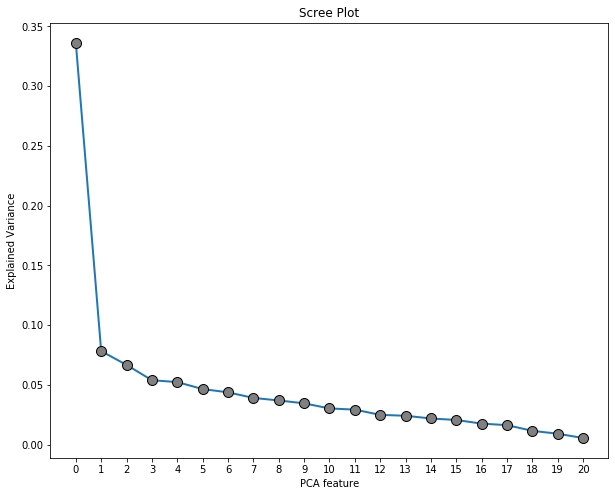

In [41]:
#Calling the scree plot function
scree_plot(pca_object=pca)

<strong>Based on the Scree plot, it is a good choice to go with 4 Principal Components, as seen by the elbow of the plot at 4 PCA feature, after which there is very less change in explained variance.</strong>

In [42]:
#Instanting a PCA object with just the first 4 PC's
pca4 = PCA(n_components = 4,
           random_state = 222)

#Fitting and Transforming the scaled survey data
pca4_survey_hultdna = pca4.fit_transform(survey_answers_hultdna_scaled)

<br><br><strong>Checking each components explained Variance ratio</strong>

In [43]:
#Component number counter
component_number = 0


#Looping over each principal component
for variance in pca4.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.336
PC 2 : 0.078
PC 3 : 0.067
PC 4 : 0.054


<br><br><br><strong>Understanding the meaning of each principal component by analyzing its factor loading</strong>

In [44]:
#Transposing pca components
factor_loadings_hultdna_df = pd.DataFrame(pd.np.transpose(pca4.components_))


#Naming rows as original features
factor_loadings_hultdna_df = factor_loadings_hultdna_df.set_index(survey_answers_hultdna_scaled_df.columns)


#Checking the result
print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 1
---------------------------------------""")
print(factor_loadings_hultdna_df.iloc[:,0][factor_loadings_hultdna_df.iloc[:,0] > 0.05].sort_values(ascending = False))
print("\n")
print(factor_loadings_hultdna_df.iloc[:,0][factor_loadings_hultdna_df.iloc[:,0] < -0.23].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 2
---------------------------------------""")
print(factor_loadings_hultdna_df.iloc[:,1][factor_loadings_hultdna_df.iloc[:,1]>0.25].sort_values(ascending = False))
print("\n")
print(factor_loadings_hultdna_df.iloc[:,1][factor_loadings_hultdna_df.iloc[:,1]<-0.07].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 3
---------------------------------------""")
print(factor_loadings_hultdna_df.iloc[:,2][factor_loadings_hultdna_df.iloc[:,2]>0.15].sort_values(ascending = False))
print("\n")
print(factor_loadings_hultdna_df.iloc[:,2][factor_loadings_hultdna_df.iloc[:,2]<-0.1].sort_values(ascending = True))
print("\n\n")

print(f"""
---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 4
---------------------------------------""")
print(factor_loadings_hultdna_df.iloc[:,3][factor_loadings_hultdna_df.iloc[:,3]>0.19].sort_values(ascending = False))
print("\n")
print(factor_loadings_hultdna_df.iloc[:,3][factor_loadings_hultdna_df.iloc[:,3]<-0.16].sort_values(ascending = True))
print("\n\n")


---------------------------------------
FACTOR LOADING: PRINCIPAL COMPONENT 1
---------------------------------------
dont_generate_new_ideas                0.080267
dont_persuasively_sell_vision/idea     0.074569
cant_rally_team_towards_common_goal    0.070147
Name: 0, dtype: float64


responds_effectively_to_priorities(duplicate)      -0.275576
takes_initiative                                   -0.261696
takes_initiative(duplicate)                        -0.258791
encourages_direct/open_discussions                 -0.256175
resolves_conflicts_constructively                  -0.255759
encourages_direct/open_discussions(duplicate)      -0.252322
responds_effectively_to_priorities                 -0.247252
effectively_negotiates_interests/resources/roles   -0.245515
coaches_teammates_for_performance/growth           -0.235774
works_well_with_people_from_diverse_cultures       -0.232192
builds_cooperative_relationships                   -0.232087
Name: 0, dtype: float64




------------

In [45]:
factor_loadings_hultdna_df.columns = ['not_so_bright',
                                      'growth_mindset',
                                      'unconvincing',
                                      'inefficient']

factor_loadings_hultdna_df

,not_so_bright,growth_mindset,unconvincing,inefficient
sees_underlying_patters_in_complex_situations,-0.200906,-0.128837,-0.083049,0.128559
dont_generate_new_ideas,0.080267,0.059266,0.449421,-0.527955
aware_of_personal_strengths/weakness,-0.214944,-0.002692,0.126075,-0.082147
growth_mindset,-0.227228,-0.033619,-0.104864,0.118858
responds_effectively_to_priorities,-0.247252,-0.218732,0.071323,-0.035643
takes_initiative,-0.261696,-0.263740,0.220978,0.135066
encourages_direct/open_discussions,-0.256175,-0.205202,0.066068,-0.083617
responds_effectively_to_priorities(duplicate),-0.275576,-0.185017,0.110332,-0.081618
takes_initiative(duplicate),-0.258791,-0.300070,0.203744,0.004611
encourages_direct/open_discussions(duplicate),-0.252322,-0.185222,0.177639,-0.148306


<br><br><br><strong>Analyzing how each surveyor fits into each of the Principal Components</strong>

In [46]:
#Converting the earlier fit and transformed pca7 object into a Dataframe
pca4_survey_hultdna_df = pd.DataFrame(pca4_survey_hultdna)

#Renaming columns
pca4_survey_hultdna_df.columns = factor_loadings_hultdna_df.columns

#Displaying the results
pca4_survey_hultdna_df

,not_so_bright,growth_mindset,unconvincing,inefficient
0,0.002541,-0.289953,-0.099617,0.043239
1,-1.186671,-0.570029,0.232524,1.384595
2,2.777220,-1.030334,-1.691554,-0.371834
3,-2.112491,2.126098,1.558631,0.568255
4,4.199188,0.018369,1.781101,-0.474963
...,...,...,...,...
387,1.996043,-0.191462,-0.644337,0.001651
388,0.210548,-0.255782,1.115379,-0.266251
389,-4.846997,0.234791,1.247980,2.084884
390,-4.233640,1.226943,-0.952484,0.319997


<br><br><br>
***
***
***
<h3>Clustering</h3>

***
***
***

<h4>Clustering using the chosen 7 Principal components of the survey answers explanatory variables</h4>

In [47]:
#Checking the variance of the pca7_survey object
#pd.np.var(pca7_survey_df)

<strong>Rescaling our data, as the variance among features is no longer same in the new dataset.</strong>

In [48]:
#Instantiating a Standard Scaler object
#scaler = StandardScaler()

#Fitting the scaler object to the dataset
#scaler.fit(pca7_survey_df)

#Transforming the fit data
#pca7_survey_scaled = scaler.transform(pca7_survey_df)

#Converting it into a dataframe
#pca7_survey_scaled_df = pd.DataFrame(pca7_survey_scaled)

#Renaming the columns
#pca7_survey_scaled_df.columns = factor_loadings_df.columns

#Checking the variance
#pd.np.var(pca7_survey_scaled_df)

<br><br><strong>Creating a dendogram to determine the number of cluster for KNN modeling</strong>

In [49]:
#Grouping data based on Ward distance
#standard_mergings_ward = linkage(y = pca7_survey_scaled_df,
#                                 method = 'ward')


#Setting plot size
#fig, ax = plt.subplots(figsize=(12, 12))

#Developing a dendrogram
#dendrogram(Z = standard_mergings_ward,
#           leaf_rotation = 90,
#           leaf_font_size = 6)

#plt.show()

<strong>Plotting an inertia plot to see viable candidates for determining the number of clusters to be used in KMeans modeling</strong>

In [50]:
#Calling the inertia_plot function
#inertia_plot(data = pca7_survey_scaled_df)

<strong>Based on the inertia plot, lets use 5 clusters for building the KMeans model</strong>

In [51]:
#INSTANTIATING a k-Means object with five clusters
#survey_answers_kmeans_pca = KMeans(n_clusters = 5,
#                              random_state = 222)


#Fitting the object to the data
#survey_answers_kmeans_pca.fit(pca7_survey_scaled_df)


#Converting the clusters to a DataFrame
#survey_answers_kmeans_pca_df = pd.DataFrame({'Cluster': survey_answers_kmeans_pca.labels_})


#Checking the results
#print(survey_answers_kmeans_pca_df.iloc[: , 0].value_counts())

<strong>Finding the centroids of each cluster, in an attempt to explain the underlying story of ideal members of each cluster.</strong>

In [52]:
#Creating an object to store the cluster centers
#centroids_survey_answers_kmeans_pca = survey_answers_kmeans_pca.cluster_centers_

#Converting cluster centers into a dataframe
#centroids_survey_answers_kmeans_pca_df = pd.DataFrame(centroids_survey_answers_kmeans_pca)

#Renaming the columns
#centroids_survey_answers_kmeans_pca_df.columns = pca7_survey_scaled_df.columns

#Checking the results
#centroids_survey_answers_kmeans_pca_df

In [53]:
#Concatenating the cluster and PCA components
#cluster_pca_df = pd.concat([survey_answers_kmeans_pca_df,
#                           pca7_survey_df],
#                           axis = 1)

#Checking the results
#cluster_pca_df

In [54]:
#Concatenating the earlier eliminated columns
#final_cluster_pca_df = pd.concat([original_df.loc[:, ['target','current_laptop', 'surveyID', 'program', 'age', 'gender', 'nationality', 'ethnicity']],
#                                 cluster_pca_df], 
#                                 axis = 1)

#Checking the results
#final_cluster_pca_df

<h4>Clustering using the chosen 7 Principal components of the survey answers big5 personality traits explanatory variables</h4>

In [55]:
#Checking the variance of the pca7_survey object
pd.np.var(pca7_survey_big5_df)

prefer_isolation          6.440682
moody                     4.193332
non_party_person          3.601184
strong_verbal_aptitude    2.745168
relaxed                   2.486520
systematic                2.016174
creative                  1.707309
dtype: float64

<strong>Rescaling our data, as the variance among features is no longer same in the new dataset.</strong>

In [56]:
#Instantiating a Standard Scaler object
scaler = StandardScaler()

#Fitting the scaler object to the dataset
scaler.fit(pca7_survey_big5_df)

#Transforming the fit data
pca7_survey_big5_scaled = scaler.transform(pca7_survey_big5_df)

#Converting it into a dataframe
pca7_survey_big5_scaled_df = pd.DataFrame(pca7_survey_big5_scaled)

#Renaming the columns
pca7_survey_big5_scaled_df.columns = factor_loadings_big5_df.columns

#Checking the variance
pd.np.var(pca7_survey_big5_scaled_df)

prefer_isolation          1.0
moody                     1.0
non_party_person          1.0
strong_verbal_aptitude    1.0
relaxed                   1.0
systematic                1.0
creative                  1.0
dtype: float64

<br><br><strong>Creating a dendogram to determine the number of cluster for KNN modeling</strong>

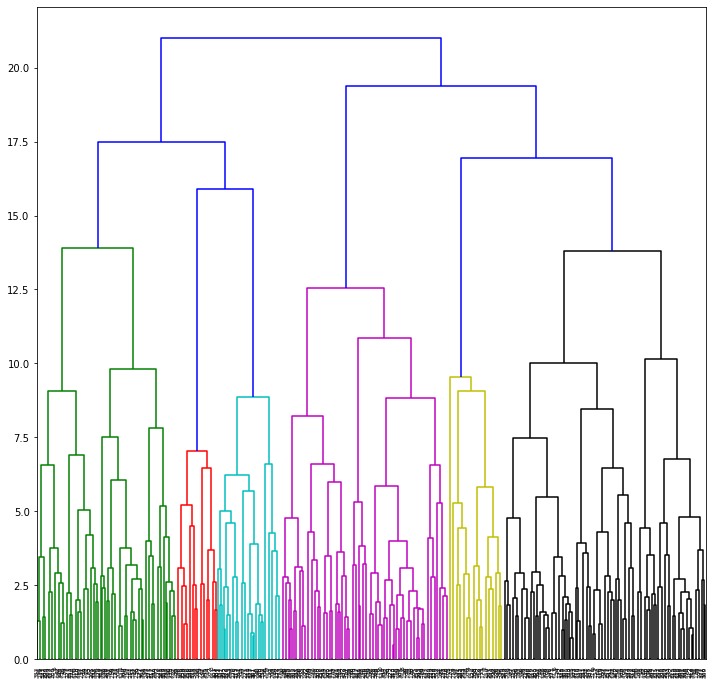

In [57]:
#Grouping data based on Ward distance
standard_mergings_ward = linkage(y      = pca7_survey_big5_scaled_df,
                                 method = 'ward')


#Setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

#Developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90,
           leaf_font_size = 6)

plt.show()

<strong>Plotting an inertia plot to see viable candidates for determining the number of clusters to be used in KMeans modeling</strong>

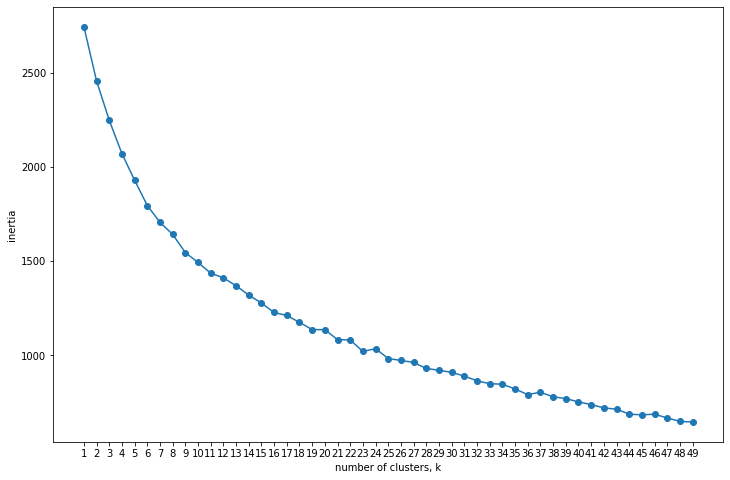

In [58]:
#Calling the inertia_plot function
inertia_plot(data = pca7_survey_big5_scaled_df)

<strong>Based on the inertia plot, lets use 3 clusters for building the KMeans model</strong>

In [59]:
#INSTANTIATING a k-Means object with 3 clusters
survey_answers_big5_kmeans_pca = KMeans(n_clusters   = 3,
                                        random_state = 222)


#Fitting the object to the data
survey_answers_big5_kmeans_pca.fit(pca7_survey_big5_scaled_df)


#Converting the clusters to a DataFrame
survey_answers_big5_kmeans_pca_df = pd.DataFrame({'Cluster': survey_answers_big5_kmeans_pca.labels_})


#Checking the results
print(survey_answers_big5_kmeans_pca_df.iloc[: , 0].value_counts())

1    144
2    137
0    111
Name: Cluster, dtype: int64


<strong>Finding the centroids of each cluster, in an attempt to explain the underlying story of ideal members of each cluster.</strong>

In [60]:
#Creating an object to store the cluster centers
centroids_survey_answers_big5_kmeans_pca = survey_answers_big5_kmeans_pca.cluster_centers_

#Converting cluster centers into a dataframe
centroids_survey_answers_big5_kmeans_pca_df = pd.DataFrame(centroids_survey_answers_big5_kmeans_pca)

#Renaming the columns
centroids_survey_answers_big5_kmeans_pca_df.columns = pca7_survey_big5_scaled_df.columns

#Checking the results
centroids_survey_answers_big5_kmeans_pca_df

,prefer_isolation,moody,non_party_person,strong_verbal_aptitude,relaxed,systematic,creative
0,0.077506,0.375179,0.770498,-0.134602,0.868928,0.282703,-0.102991
1,0.742348,-0.063185,-0.206898,0.287978,-0.422138,-0.148404,0.473503
2,-0.843076,-0.237564,-0.406802,-0.193635,-0.260315,-0.073064,-0.414251


In [61]:
#Concatenating the cluster and PCA components
cluster_pca_big5_df = pd.concat([survey_answers_big5_kmeans_pca_df,
                                pca7_survey_big5_df],
                                axis = 1)

#Checking the results
cluster_pca_big5_df

,Cluster,prefer_isolation,moody,non_party_person,strong_verbal_aptitude,relaxed,systematic,creative
0,1,0.163166,-0.260266,0.387455,1.085446,-1.601504,0.896288,-0.244559
1,0,0.753219,0.357543,2.044443,1.060509,1.821249,0.376099,1.057837
2,1,0.993750,-4.483148,-2.417418,3.012941,-0.231447,2.099992,0.239003
3,0,0.253881,2.894208,0.520128,-1.797544,2.422311,-0.158532,1.705412
4,1,3.489476,1.268058,-1.779067,0.603904,-0.006121,1.683310,0.021653
...,...,...,...,...,...,...,...,...
387,2,-3.215937,-1.116377,1.484496,-0.554004,-0.212076,0.490008,-0.042005
388,1,3.370587,-0.678643,-0.230204,0.595241,-0.810533,-0.182529,-0.271820
389,0,-3.873181,-0.851443,3.136824,-0.844649,1.564527,0.421931,3.553197
390,2,-6.128999,-1.289761,-1.266585,-1.272721,-0.535967,1.267536,0.109639


In [62]:
#Concatenating the earlier eliminated columns
final_cluster_pca_big5_df = pd.concat([original_df.loc[:, ['preferred_laptop','current_laptop', 'surveyID', 'program', 'age', 'gender', 'nationality', 'ethnicity']],
                                      cluster_pca_big5_df], 
                                      axis = 1)

#Checking the results
final_cluster_pca_big5_df

,preferred_laptop,current_laptop,surveyID,program,age,gender,nationality,ethnicity,Cluster,prefer_isolation,moody,non_party_person,strong_verbal_aptitude,relaxed,systematic,creative
0,Macbook,Macbook,a1000,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,1,0.163166,-0.260266,0.387455,1.085446,-1.601504,0.896288,-0.244559
1,Windows laptop,Windows laptop,a1001,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,0,0.753219,0.357543,2.044443,1.060509,1.821249,0.376099,1.057837
2,Windows laptop,Windows laptop,a1002,One year Business Analytics,25,Male,Indian,West Asian / Indian,1,0.993750,-4.483148,-2.417418,3.012941,-0.231447,2.099992,0.239003
3,Windows laptop,Windows laptop,a1003,One year Business Analytics,26,Female,indian,West Asian / Indian,0,0.253881,2.894208,0.520128,-1.797544,2.422311,-0.158532,1.705412
4,Windows laptop,Macbook,a1004,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,1,3.489476,1.268058,-1.779067,0.603904,-0.006121,1.683310,0.021653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Windows laptop,Windows laptop,a1387,DD (MBA & Business Analytics),37,Male,calm,Hispanic / Latino,2,-3.215937,-1.116377,1.484496,-0.554004,-0.212076,0.490008,-0.042005
388,Macbook,Macbook,a1388,DD (MIB & Business Analytics),27,Female,.,White / Caucasian,1,3.370587,-0.678643,-0.230204,0.595241,-0.810533,-0.182529,-0.271820
389,Macbook,Windows laptop,a1389,DD (MIB & Business Analytics),23,Male,India,West Asian / Indian,0,-3.873181,-0.851443,3.136824,-0.844649,1.564527,0.421931,3.553197
390,Windows laptop,Windows laptop,a1390,DD (MIB & Business Analytics),25,Male,INDIAN,West Asian / Indian,2,-6.128999,-1.289761,-1.266585,-1.272721,-0.535967,1.267536,0.109639


In [63]:
#Gaining greater insights
strong_verbal_aptitude = final_cluster_pca_big5_df[['strong_verbal_aptitude', 'Cluster', 'current_laptop', 'preferred_laptop']][final_cluster_pca_big5_df['strong_verbal_aptitude']>1.0]

print(strong_verbal_aptitude)
print("\n\n")
print(strong_verbal_aptitude['current_laptop'].value_counts())
print("\n\n")
print(strong_verbal_aptitude['preferred_laptop'].value_counts())

     strong_verbal_aptitude  Cluster  current_laptop preferred_laptop
0                  1.085446        1         Macbook          Macbook
1                  1.060509        0  Windows laptop   Windows laptop
2                  3.012941        1  Windows laptop   Windows laptop
10                 2.347378        2  Windows laptop       Chromebook
18                 2.154851        1  Windows laptop   Windows laptop
..                      ...      ...             ...              ...
363                2.091723        1         Macbook          Macbook
368                1.893983        2  Windows laptop   Windows laptop
373                1.015738        1  Windows laptop          Macbook
377                2.422757        1         Macbook          Macbook
381                2.011283        2         Macbook          Macbook

[103 rows x 4 columns]



Macbook           59
Windows laptop    43
MAC                1
Name: current_laptop, dtype: int64



Macbook           58
Windows lap

<strong>INSIGHT:</strong><br>People belonging to the Principal component which says they have a strong verbal aptitude are most likely to own a Macbook as well as say they would prefer a Macbook over a PC.<br>This is also backed up with research conducted by  <a href="https://www.hongkiat.com/blog/mac-vs-pc-myth-busting-consumer-guide/">Nina Krimly</a> and research by <a href="https://www.huffpost.com/entry/mac-vs-pc-what-your-os-says-about-you_n_852170">Thomas Houston</a>

In [64]:
#Gaining greater insights
non_party_person = final_cluster_pca_big5_df[['non_party_person', 'Cluster', 'current_laptop', 'preferred_laptop']][final_cluster_pca_big5_df['non_party_person']>1.0]

print(non_party_person)
print("\n\n")
print(non_party_person['current_laptop'].value_counts())
print("\n\n")
print(non_party_person['preferred_laptop'].value_counts())

     non_party_person  Cluster  current_laptop preferred_laptop
1            2.044443        0  Windows laptop   Windows laptop
10           1.278571        2  Windows laptop       Chromebook
12           1.084207        0  Windows laptop   Windows laptop
14           2.552800        0         Macbook          Macbook
15           1.707022        1  Windows laptop   Windows laptop
..                ...      ...             ...              ...
380          1.673231        1  Windows laptop   Windows laptop
383          4.574644        0         Macbook          Macbook
387          1.484496        2  Windows laptop   Windows laptop
389          3.136824        0  Windows laptop          Macbook
391          1.186930        0  Windows laptop   Windows laptop

[112 rows x 4 columns]



Windows laptop    73
Macbook           39
Name: current_laptop, dtype: int64



Windows laptop    58
Macbook           52
Chromebook         2
Name: preferred_laptop, dtype: int64


<strong>INSIGHT 3:</strong><br>People who don't like partying or even throwing a party, are likely to currently own a Windows laptop and probably would prefer a Windows Laptop. However the count of people not interested in parties and who prefer a Windows or a Mac is almost the same, if price for both is equal.<br>This is backed up by external research from <a href="https://www.hongkiat.com/blog/mac-vs-pc-myth-busting-consumer-guide/">Nina Krimly</a> and research by <a href="https://www.huffpost.com/entry/mac-vs-pc-what-your-os-says-about-you_n_852170">Thomas Houston</a>

<h4>Clustering using the chosen 4 Principal components of the survey answers hult dna explanatory variables</h4>

In [65]:
#Checking the variance of the pca7_survey object
pd.np.var(pca4_survey_hultdna_df)

not_so_bright     7.062184
growth_mindset    1.643652
unconvincing      1.401190
inefficient       1.132304
dtype: float64

<strong>Rescaling our data, as the variance among features is no longer same in the new dataset.</strong>

In [66]:
#Instantiating a Standard Scaler object
scaler = StandardScaler()

#Fitting the scaler object to the dataset
scaler.fit(pca4_survey_hultdna_df)

#Transforming the fit data
pca4_survey_hultdna_scaled = scaler.transform(pca4_survey_hultdna_df)

#Converting it into a dataframe
pca4_survey_hultdna_scaled_df = pd.DataFrame(pca4_survey_hultdna_scaled)

#Renaming the columns
pca4_survey_hultdna_scaled_df.columns = factor_loadings_hultdna_df.columns

#Checking the variance
pd.np.var(pca4_survey_hultdna_scaled_df)

not_so_bright     1.0
growth_mindset    1.0
unconvincing      1.0
inefficient       1.0
dtype: float64

<br><br><strong>Creating a dendogram to determine the number of cluster for KNN modeling</strong>

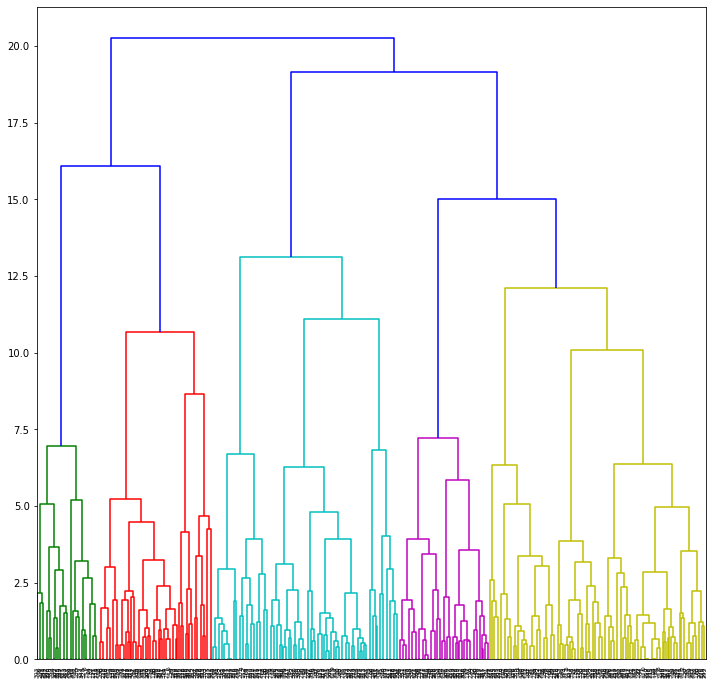

In [67]:
#Grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca4_survey_hultdna_scaled_df,
                                 method = 'ward')


#Setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

#Developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90,
           leaf_font_size = 6)

plt.show()

<strong>Plotting an inertia plot to see viable candidates for determining the number of clusters to be used in KMeans modeling</strong>

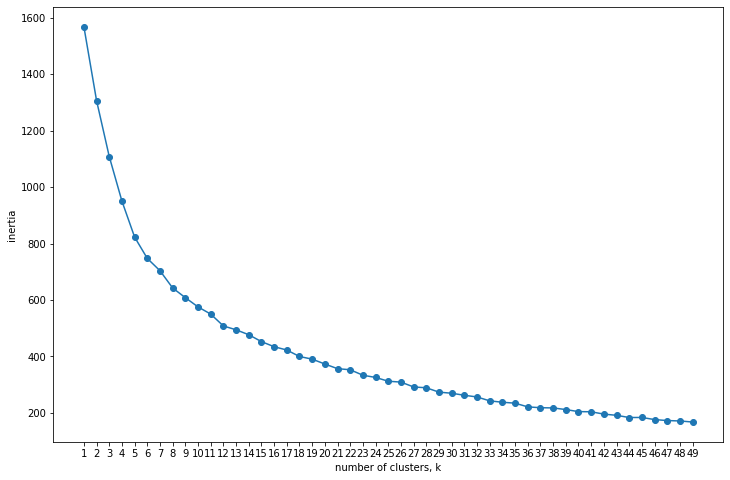

In [68]:
#Calling the inertia_plot function
inertia_plot(data = pca4_survey_hultdna_scaled_df)

<strong>Based on the inertia plot, lets use 4 clusters for building the KMeans model</strong>

In [69]:
#INSTANTIATING a k-Means object with five clusters
survey_answers_hultdna_kmeans_pca = KMeans(n_clusters   = 4,
                                           random_state = 222)


#Fitting the object to the data
survey_answers_hultdna_kmeans_pca.fit(pca4_survey_hultdna_scaled_df)


#Converting the clusters to a DataFrame
survey_answers_hultdna_kmeans_pca_df = pd.DataFrame({'Cluster': survey_answers_hultdna_kmeans_pca.labels_})


#Checking the results
print(survey_answers_hultdna_kmeans_pca_df.iloc[: , 0].value_counts())

0    121
3    101
1     88
2     82
Name: Cluster, dtype: int64


<strong>Finding the centroids of each cluster, in an attempt to explain the underlying story of ideal members of each cluster.</strong>

In [70]:
#Creating an object to store the cluster centers
centroids_survey_answers_hultdna_kmeans_pca = survey_answers_hultdna_kmeans_pca.cluster_centers_

#Converting cluster centers into a dataframe
centroids_survey_answers_hultdna_kmeans_pca_df = pd.DataFrame(centroids_survey_answers_hultdna_kmeans_pca)

#Renaming the columns
centroids_survey_answers_hultdna_kmeans_pca_df.columns = pca4_survey_hultdna_scaled_df.columns

#Checking the results
centroids_survey_answers_hultdna_kmeans_pca_df

,not_so_bright,growth_mindset,unconvincing,inefficient
0,-0.700426,-0.366444,-0.757627,-0.147677
1,0.839560,0.835135,-0.557224,0.007511
2,-0.508441,0.353751,0.839475,0.991063
3,0.520420,-0.575839,0.711600,-0.634249


In [71]:
#Concatenating the cluster and PCA components
cluster_pca_hultdna_df = pd.concat([survey_answers_hultdna_kmeans_pca_df,
                                   pca4_survey_hultdna_df],
                                   axis = 1)

#Checking the results
cluster_pca_hultdna_df

,Cluster,not_so_bright,growth_mindset,unconvincing,inefficient
0,0,0.002541,-0.289953,-0.099617,0.043239
1,2,-1.186671,-0.570029,0.232524,1.384595
2,1,2.777220,-1.030334,-1.691554,-0.371834
3,2,-2.112491,2.126098,1.558631,0.568255
4,3,4.199188,0.018369,1.781101,-0.474963
...,...,...,...,...,...
387,1,1.996043,-0.191462,-0.644337,0.001651
388,3,0.210548,-0.255782,1.115379,-0.266251
389,2,-4.846997,0.234791,1.247980,2.084884
390,0,-4.233640,1.226943,-0.952484,0.319997


In [72]:
#Concatenating the earlier eliminated columns
final_cluster_pca_hultdna_df = pd.concat([original_df.loc[:, ['preferred_laptop','current_laptop', 'surveyID', 'program', 'age', 'gender', 'nationality', 'ethnicity']],
                                         cluster_pca_hultdna_df], 
                                         axis = 1)

#Checking the results
final_cluster_pca_hultdna_df

,preferred_laptop,current_laptop,surveyID,program,age,gender,nationality,ethnicity,Cluster,not_so_bright,growth_mindset,unconvincing,inefficient
0,Macbook,Macbook,a1000,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,0,0.002541,-0.289953,-0.099617,0.043239
1,Windows laptop,Windows laptop,a1001,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,2,-1.186671,-0.570029,0.232524,1.384595
2,Windows laptop,Windows laptop,a1002,One year Business Analytics,25,Male,Indian,West Asian / Indian,1,2.777220,-1.030334,-1.691554,-0.371834
3,Windows laptop,Windows laptop,a1003,One year Business Analytics,26,Female,indian,West Asian / Indian,2,-2.112491,2.126098,1.558631,0.568255
4,Windows laptop,Macbook,a1004,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,3,4.199188,0.018369,1.781101,-0.474963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Windows laptop,Windows laptop,a1387,DD (MBA & Business Analytics),37,Male,calm,Hispanic / Latino,1,1.996043,-0.191462,-0.644337,0.001651
388,Macbook,Macbook,a1388,DD (MIB & Business Analytics),27,Female,.,White / Caucasian,3,0.210548,-0.255782,1.115379,-0.266251
389,Macbook,Windows laptop,a1389,DD (MIB & Business Analytics),23,Male,India,West Asian / Indian,2,-4.846997,0.234791,1.247980,2.084884
390,Windows laptop,Windows laptop,a1390,DD (MIB & Business Analytics),25,Male,INDIAN,West Asian / Indian,0,-4.233640,1.226943,-0.952484,0.319997


In [73]:
#Gaining greater insights
growth_mindset = final_cluster_pca_hultdna_df[['growth_mindset', 'Cluster', 'current_laptop', 'preferred_laptop']][final_cluster_pca_hultdna_df['growth_mindset']>1.0]

print(growth_mindset)
print("\n\n")
print(growth_mindset['Cluster'].value_counts())
print("\n\n")
print(growth_mindset['current_laptop'].value_counts())
print("\n\n")
print(growth_mindset['preferred_laptop'].value_counts())

     growth_mindset  Cluster  current_laptop preferred_laptop
3          2.126098        2  Windows laptop   Windows laptop
6          1.033089        2  Windows laptop          Macbook
14         1.602715        2         Macbook          Macbook
21         2.100257        1         Macbook          Macbook
26         1.713289        1  Windows laptop          Macbook
..              ...      ...             ...              ...
375        2.460189        1         Macbook          Macbook
382        1.139921        0         Macbook          Macbook
383        1.087185        2         Macbook          Macbook
386        1.070871        1         Macbook   Windows laptop
390        1.226943        0  Windows laptop   Windows laptop

[78 rows x 4 columns]



1    43
2    29
0     6
Name: Cluster, dtype: int64



Windows laptop    48
Macbook           30
Name: current_laptop, dtype: int64



Macbook           38
Windows laptop    35
Chromebook         5
Name: preferred_laptop, dtype: i

<strong>INSIGHT 2:</strong><br> People belonging to the Growth Mindset persona (Principal Component) and mostly in Cluster 1, currently own a Windows Laptop, as seen from the standard deviation value greater than 1. But given a choice of prices being equal for both Macbook and Windows, people in the Growth Mindset persona would marginally prefer Macbook over a Windows laptop. As such Microsoft should target students, who carry a growth mindset, as most likely they would prefer currently owning a Windows laptop and also preferably stick with it in the future.<br><br><br>

<br><br><br>
***
***
***
<h3>Boxplots</h3>

***
***
***

<h4>Creating boxplots of the Principal components for the survey answers regarding Hult DNA, with regards to the current laptop that they posses</h4>

In [74]:
#not_so_bright_kid
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'not_so_bright',
#            hue  = 'Cluster',
#            data = final_cluster_pca_hultdna_df)


#plt.tight_layout()
#plt.show()

In [75]:
#teamplayer
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'growth_mindset',
#            hue  = 'Cluster',
#            data = final_cluster_pca_hultdna_df)


#plt.tight_layout()
#plt.show()

In [76]:
#unconvincing
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'unconvincing',
#            hue  = 'Cluster',
#            data = final_cluster_pca_hultdna_df)


#plt.tight_layout()
#plt.show()

In [77]:
#talented_but_not_a_teamplayer
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'inefficient',
#            hue  = 'Cluster',
#            data = final_cluster_pca_hultdna_df)


#plt.tight_layout()
#plt.show()

<h4>Creating boxplots of the Principal components for the survey answers regarding Hult DNA, separated by future laptop choice</h4>

In [78]:
#talented_but_not_a_teamplayer
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'not_so_bright',
#            hue  = 'Cluster',
#            data = final_cluster_pca_hultdna_df)


#plt.tight_layout()
#plt.show()

In [79]:
#teamplayer
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'growth_mindset',
#            hue  = 'Cluster',
#            data = final_cluster_pca_hultdna_df)


#plt.tight_layout()
#plt.show()

<strong>INSIGHT:</strong><br>For the "teamplayer" principal component, there is a big difference in mean between the surveyors who want to buy Chromebook, compared to the ones who wanna buy Macbook/Windows laptop, when asked this question. Implying, people belonging to this cluster as well as this particular principal component, have a desire to buy chromebook more than any other laptop.<br><br><br>

In [80]:
#unconvincing
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'unconvincing',
#            hue  = 'Cluster',
#            data = final_cluster_pca_hultdna_df)


#plt.tight_layout()
#plt.show()

<strong>INSIGHT:</strong><br>For the "unconvincing" principal component, for clusters 1 and 2, there tend to be fewer Chromebook buyers than Macbook/Windows, as seen by the lower mean line.<br><br><br>

In [81]:
#talented_but_not_a_teamplayer
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'inefficient',
#            hue  = 'Cluster',
#            data = final_cluster_pca_hultdna_df)


#plt.tight_layout()
#plt.show()

<strong>INSIGHT:</strong><br>For "talented_but_not_a_teamplayer" principal component, people belonging to cluster 1 tend to show a greater desire to buy Chromebook, than Macbook/Windows, as seen by the higher mean.<br><br><br>

<h4>Creating boxplots of the Principal components for the big5 personality traits survey answers, separated by current laptop.</h4>

In [82]:
#uninterested
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'prefer_isolation',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [83]:
#moody
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'moody',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [84]:
#introverts
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'non_party_person',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [85]:
#predominant
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'strong_verbal_aptitude',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [86]:
#creative_but_messy
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'relaxed',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [87]:
#systematic
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'systematic',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [88]:
#respectful
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'current_laptop',
#            y    = 'creative',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

<h4>Creating boxplots of the Principal components for the big5 personality traits survey answers, separated by future laptop choice</h4>

In [89]:
#uninterested
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'prefer_isolation',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [90]:
#moody
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'moody',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

<strong>INSIGHT:</strong><br>People belonging to the "moody" principal component and cluster 0, show a big variance, however prefer to buy Chromebook.<br><br><br>

In [91]:
#introverts
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'non_party_person',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

<strong>INSIGHT:</strong><br>People belonging to the "introverts" component and to clusters 0, 1, do not prefer to buy the Chromebook and would like to buy the Windows or the Macbook.<br><br><br>

In [92]:
#predominant
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'strong_verbal_aptitude',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [93]:
#creative_but_messy
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'relaxed',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [94]:
#systematic
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'systematic',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()

In [95]:
#respectful
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x    = 'preferred_laptop',
#            y    = 'creative',
#            hue  = 'Cluster',
#            data = final_cluster_pca_big5_df)


#plt.tight_layout()
#plt.show()